# Final Exercise Solution

* Read the tab delimited table `student_data.txt` into Python using pandas
* Display the table in jupyter
* Import the module `numpy` and use the `numpy.mean` function to calculate the mean age and mean score.
* Write a function called `score_percentage` which returns the score as a percentage of 50.
* Using a `for` loop calculate the score percentage for each person and store it in a list.
* Add this list to a table column called "Score_Percentage"
* Plot the score percentage using `matplotlib`, with student names as labels on the x axis and score percentage on the y axis
* Write a function to assign each student a score of "A" if their score percentage is greater than or equal to 70, "B" if their score percentage is greater than or equal to 60 but less than 70 and "C" if their score percentage is less than 60.
* Use this function to generate a "Final_Grade" column and add it to the table
* Plot a bar chart using matplotlib to show how many students got an "A", how many got a "B" and how many got a "C".  Change the colour and save the bar chart.
* Assign each student a random ID number using the random.randint function and add these to the table.
* Store the table in a tab delimted output file.
* Using string formatting and a `for` loop, make an output file called [Name].txt for each student which says "Dear [Name], your score was [score_percentage] and your grade was [Final_Grade]", based on the data in the table (fill in the square brackets with the correct data).

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def score_percentage(score):
    return ((score / 50) * 100)

In [3]:
def assign_grade(score_percentage):
    if score_percentage >= 70:
        grade = "A"
    elif score_percentage >= 60:
        grade = "B"
    else:
        grade = "C"
    return (grade)

In [4]:
tab = pd.read_csv("student_data.txt", sep="\t")

In [5]:
tab

,Name,Age,Score
0,Jim,15,40.8
1,Mary,24,10.0
2,Hank,17,25.2
3,Billy,31,48.4
4,Jane,33,27.0
5,Samantha,33,30.9
6,Jean,41,12.1
7,Betty,84,5.2
8,Alice,10,8.3
9,Anne,16,47.4


In [8]:
meanage = np.mean(tab['Age'])

In [9]:
print(meanage)

31.142857142857142


In [10]:
meanscore = np.mean(tab['Score'])

In [11]:
print(meanscore)

24.900000000000002


In [12]:
scoreperclist = list()
for score in list(tab['Score']):
    scoreperclist.append(score_percentage(score))

In [13]:
tab['Score_Percentage'] = scoreperclist

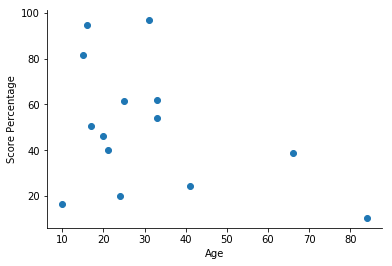

In [21]:
plt.scatter(tab['Age'], tab['Score_Percentage'])
sns.despine()
plt.xlabel("Age")
plt.ylabel("Score Percentage")
plt.show()

In [22]:
grades = list()
for scoreperc in list(tab['Score_Percentage']):
    grades.append(assign_grade(scoreperc))

In [25]:
tab['Final_Grade'] = grades

In [26]:
tab

,Name,Age,Score,Score_Percentage,Grade,Final_Grade
0,Jim,15,40.8,81.6,A,A
1,Mary,24,10.0,20.0,C,C
2,Hank,17,25.2,50.4,C,C
3,Billy,31,48.4,96.8,A,A
4,Jane,33,27.0,54.0,C,C
5,Samantha,33,30.9,61.8,B,B
6,Jean,41,12.1,24.2,C,C
7,Betty,84,5.2,10.4,C,C
8,Alice,10,8.3,16.6,C,C
9,Anne,16,47.4,94.8,A,A


In [30]:
As = grades.count('A')

In [32]:
Bs = grades.count('B')

In [33]:
Cs = grades.count('C')

In [34]:
allgrades = [As, Bs, Cs]

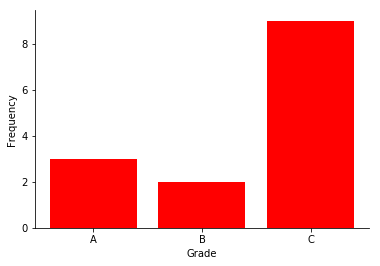

In [42]:
plt.bar(range(len(allgrades)), allgrades, color='red')
sns.despine()
plt.xticks([0, 1, 2], ['A', 'B', 'C'])
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.savefig("grades_bar_chart.png", bbox_inches='tight')
plt.show()

In [44]:
L = list()
for item in range(len(tab)):
    L.append(random.randint(0, 10000))

In [45]:
tab['Random_ID'] = L

In [46]:
tab

,Name,Age,Score,Score_Percentage,Grade,Final_Grade,Random_ID
0,Jim,15,40.8,81.6,A,A,9526
1,Mary,24,10.0,20.0,C,C,7541
2,Hank,17,25.2,50.4,C,C,2409
3,Billy,31,48.4,96.8,A,A,9274
4,Jane,33,27.0,54.0,C,C,1838
5,Samantha,33,30.9,61.8,B,B,4888
6,Jean,41,12.1,24.2,C,C,5593
7,Betty,84,5.2,10.4,C,C,1253
8,Alice,10,8.3,16.6,C,C,5330
9,Anne,16,47.4,94.8,A,A,4787


In [47]:
tab.to_csv("student_data_parsed.txt", sep="\t")

In [48]:
for i in range(len(tab)):
    nam = list(tab['Name'])[i]
    scoreperc = list(tab['Score_Percentage'])[i]
    grade = list(tab['Grade'])[i]
    mystring = "Dear %s\nYour score was %.2f and your grade was %s" % (nam, scoreperc, grade)
    out = open("%s.tsv" % nam, "w")
    out.write(mystring)
    out.close()